# CAPSTONE_FINAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth
from mlxtend.evaluate import scoring

## DATA PREPARATION

In [2]:
prod_details=pd.read_csv('PRODUCT_DETAILS.csv')
customer_details=pd.read_excel('CUSTOMER_DETAILS.xlsx')
location_details=pd.read_excel('LOCATIONS_DETAILS.xlsx')

In [3]:
print(prod_details.shape)
print(customer_details.shape)
print(location_details.shape)

(537577, 6)
(537577, 4)
(537577, 3)


In [4]:
prod_details.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,3,NaN,NaN,8370
1,1000001,P00248942,1,6.0,14.0,15200
2,1000001,P00087842,12,NaN,NaN,1422
3,1000001,P00085442,12,14.0,NaN,1057
4,1000002,P00285442,8,NaN,NaN,7969


In [5]:
customer_details.head()

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000001,F,0-17,10
2,1000001,F,0-17,10
3,1000001,F,0-17,10
4,1000002,M,55+,16


In [6]:
location_details.head()

,User_ID,City_Category,Stay_In_Current_City_Years
0,1000001,A,2
1,1000001,A,2
2,1000001,A,2
3,1000001,A,2
4,1000002,C,4+


### COMBINING DATA

In [7]:
data=pd.DataFrame()

In [8]:
prod_details.columns

Index(['User_ID', 'Product_ID', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
data[['User_ID', 'Product_ID', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase']]=prod_details[['User_ID', 'Product_ID',
       'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase']]

In [10]:
customer_details.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation'], dtype='object')

In [11]:
data[['Gender', 'Age', 'Occupation']]=customer_details[['Gender', 'Age', 'Occupation']]

In [12]:
location_details.columns

Index(['User_ID', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [13]:
data[['City_Category', 'Stay_In_Current_City_Years']]=location_details[['City_Category', 'Stay_In_Current_City_Years']]

In [14]:
data.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,P00069042,3,NaN,NaN,8370,F,0-17,10,A,2
1,1000001,P00248942,1,6.0,14.0,15200,F,0-17,10,A,2
2,1000001,P00087842,12,NaN,NaN,1422,F,0-17,10,A,2
3,1000001,P00085442,12,14.0,NaN,1057,F,0-17,10,A,2
4,1000002,P00285442,8,NaN,NaN,7969,M,55+,16,C,4+


## EXPLORATORY DATA ANALYSIS (EDA)

### UNIVARIATE ANALYSIS

#### DISTRIBUTION OF PURCHASES

Text(0.5, 1.0, 'Purchase amount Distribution')

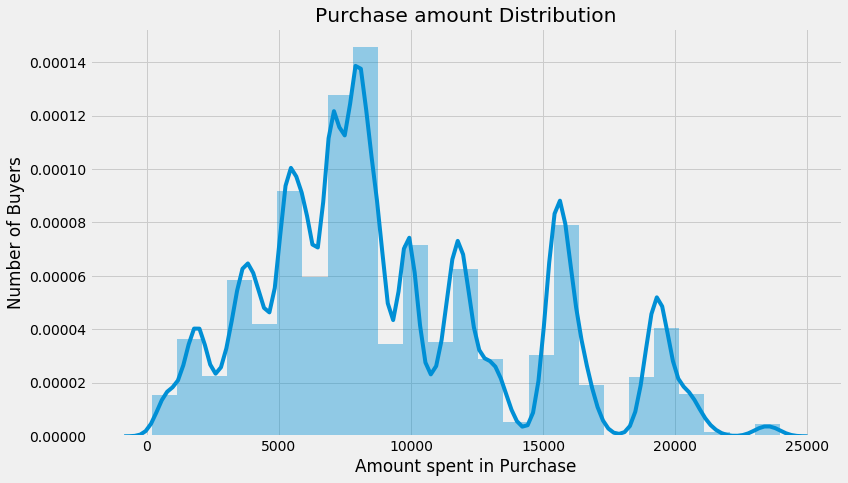

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [16]:
print ('Skew is:', data.Purchase.skew())
print('Kurtosis: %f' % data.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


#### NUMERICAL PREDICTORS

In [17]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
Occupation              int64
dtype: object

#### DISTRIBUTION OF OCCUPATION

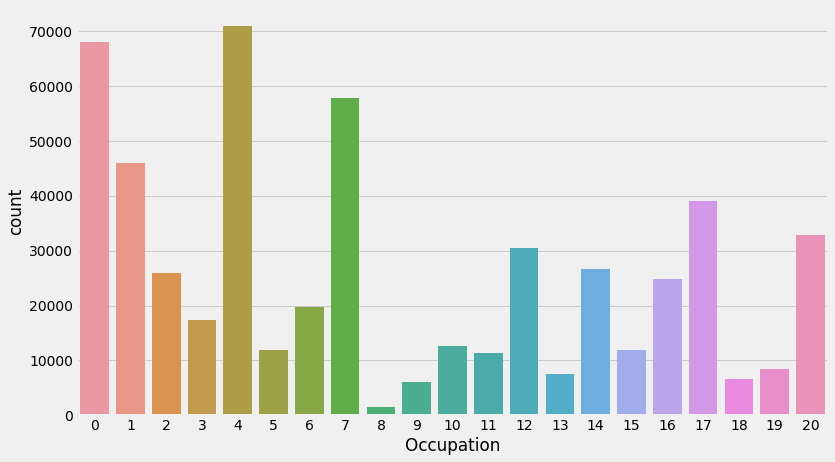

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(data.Occupation)
plt.show()

#### DISTRIBUTION OF PRODUCT CATEGORY 1

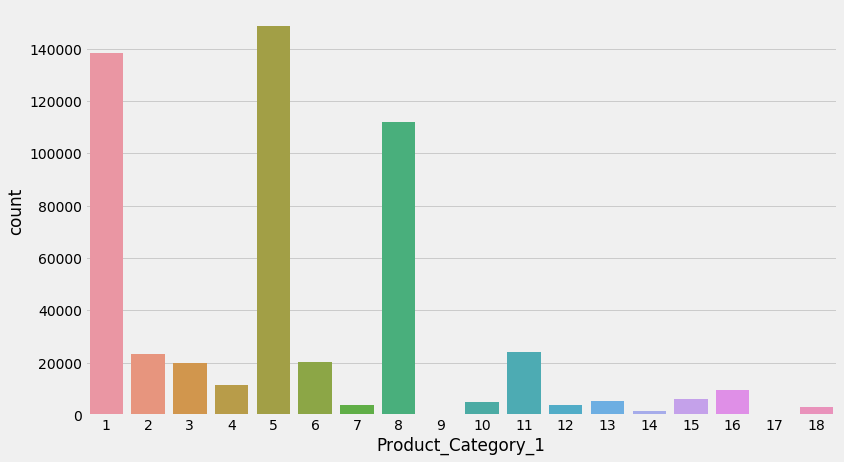

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(data.Product_Category_1)
plt.show()

#### DISTRIBUTION OF PRODUCT CATEGORY 2

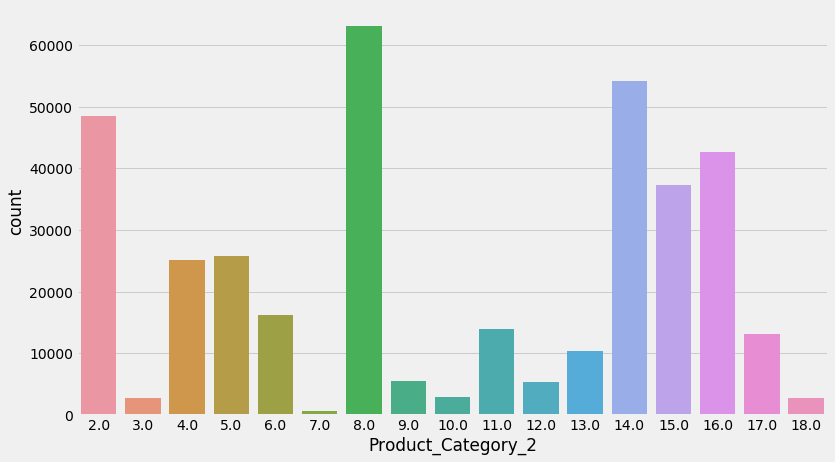

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(data.Product_Category_2)
plt.show()

#### DISTRIBUTION OF PRODUCT CATEGORY 3

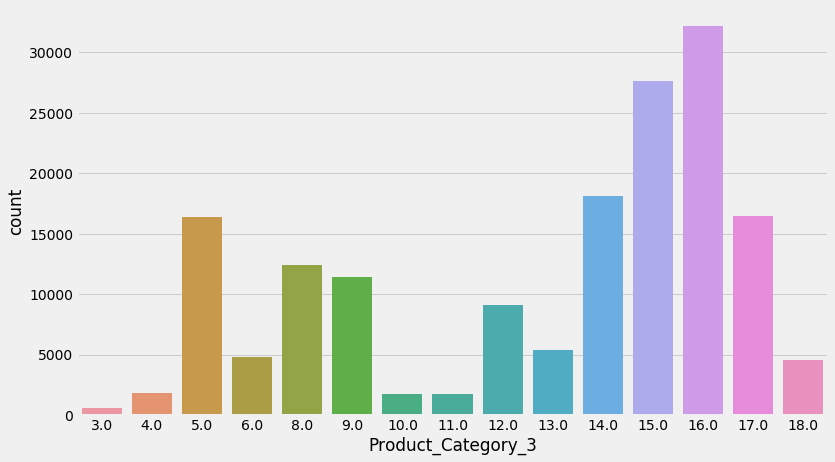

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data.Product_Category_3)
plt.show()

#### CORRELATION BETWEEN NUMERICAL PREDICTORS AND PURCHASE

In [22]:
numeric_features

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation
0,1000001,3,NaN,NaN,8370,10
1,1000001,1,6.0,14.0,15200,10
2,1000001,12,NaN,NaN,1422,10
3,1000001,12,14.0,NaN,1057,10
4,1000002,8,NaN,NaN,7969,16
...,...,...,...,...,...,...
537572,1004737,1,2.0,NaN,11664,16
537573,1004737,1,15.0,16.0,19196,16
537574,1004737,8,15.0,NaN,8043,16
537575,1004737,5,NaN,NaN,7172,16


In [23]:
numeric=numeric_features.drop('User_ID',axis=1)
corr = numeric.corr()
print (corr['Purchase'].sort_values(ascending=False))

Purchase              1.000000
Occupation            0.021104
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64


#### CORRELATION MATRIX

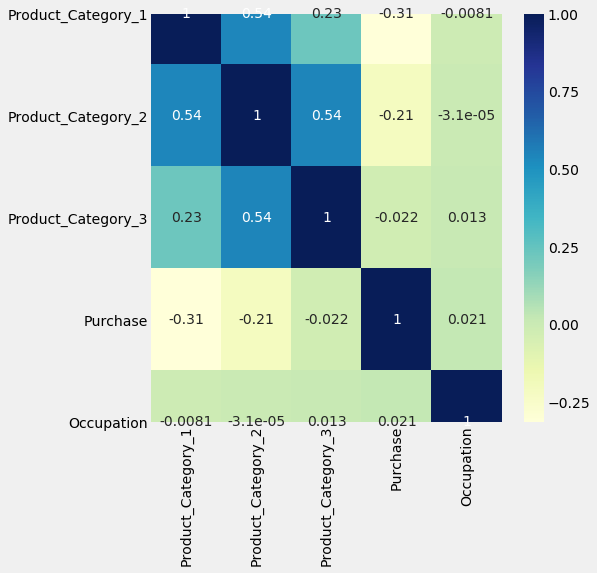

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

#### CATEGORICAL PREDICTORS

In [25]:
numeric_features = data.select_dtypes(include=[object])
numeric_features.dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

#### DISTRIBUTION OF GENDER

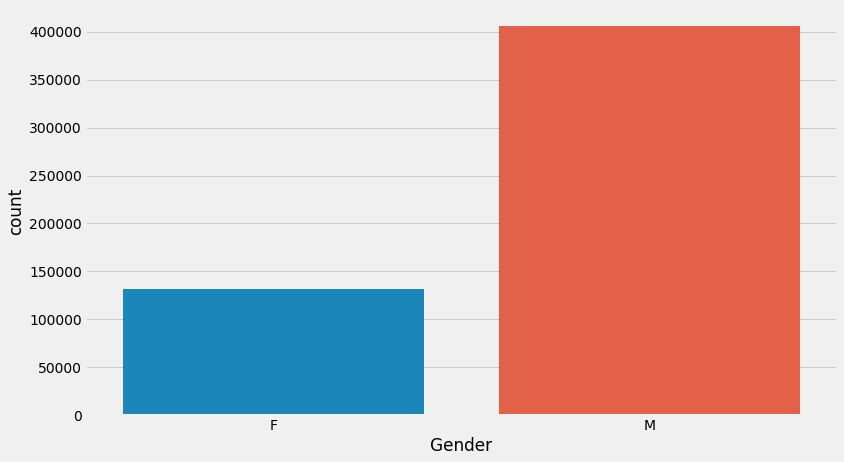

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(data.Gender)
plt.show()

#### DISTRIBUTION OF AGE

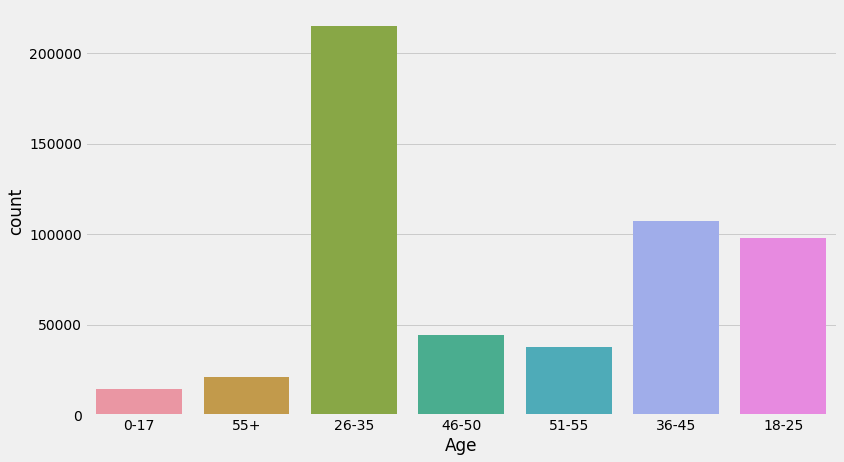

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(data.Age)
plt.show()

#### DISTRIBUTION OF CITY CATEGORY

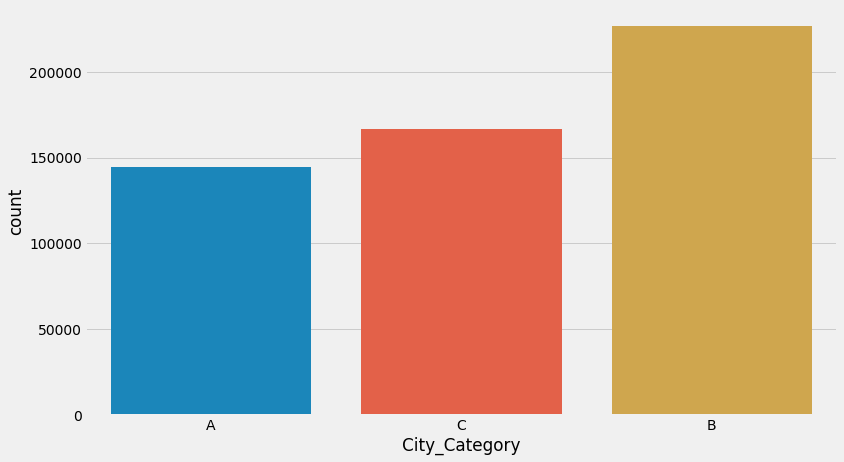

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(data.City_Category)
plt.show()

#### DISTRIBUTION OF STAY IN CURRENT CITY

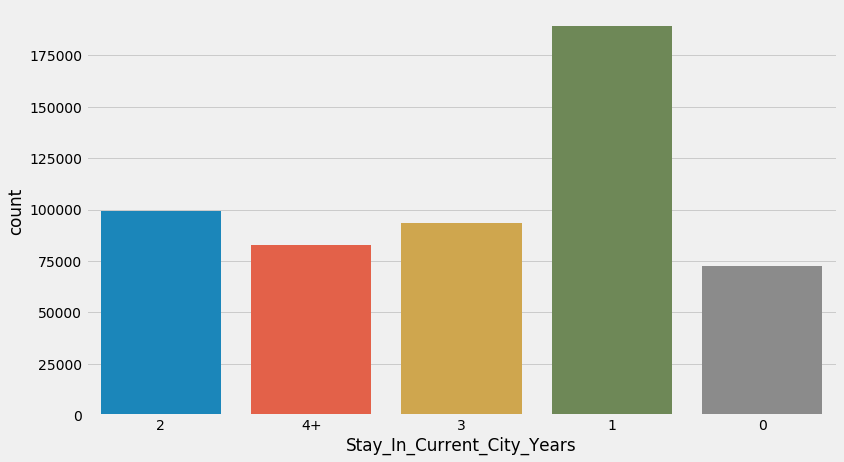

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(data.Stay_In_Current_City_Years)
plt.show()

### BIVARIATE ANALYSIS

#### NUMERICAL VARIABLES

#### OCCUPATION AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

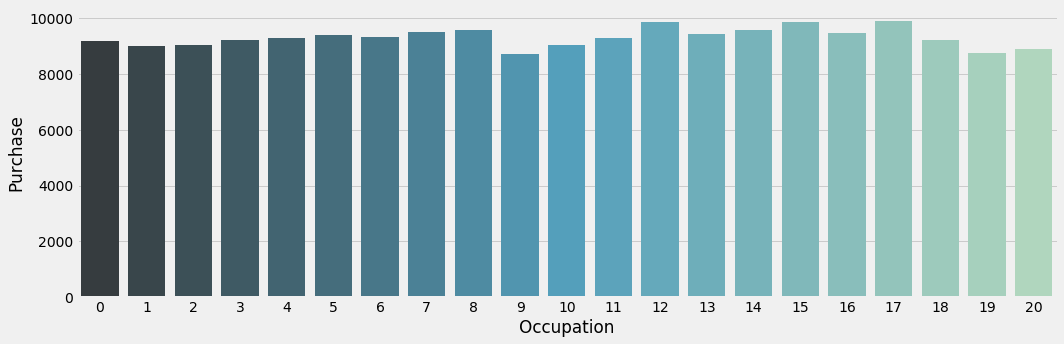

In [30]:
plt.figure(figsize=(20,20))
sns.catplot('Occupation', 'Purchase',kind='bar', data = data,palette='GnBu_d',ci=None,aspect=3)
plt.show()

#### PRODUCT CATEGORY 1 AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

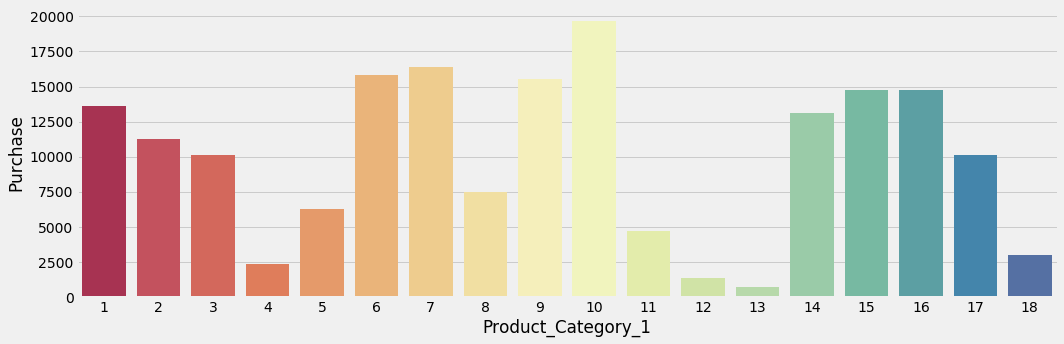

In [31]:
plt.figure(figsize=(20,20))
sns.catplot('Product_Category_1', 'Purchase',kind='bar', data = data,palette='Spectral',ci=None,aspect=3)
plt.show()

#### PRODUCT CATEGORY 2 AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

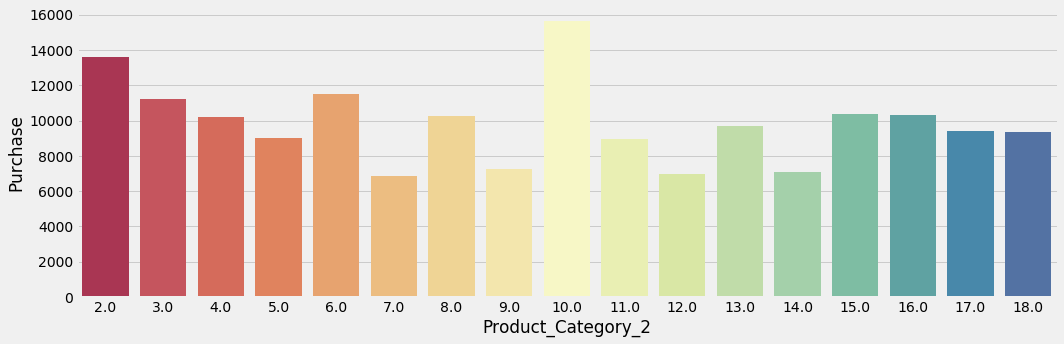

In [32]:
plt.figure(figsize=(20,20))
sns.catplot('Product_Category_2', 'Purchase',kind='bar', data = data,palette='Spectral',ci=None,aspect=3)
plt.show()

#### PRODUCT CATEGORY 3 AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

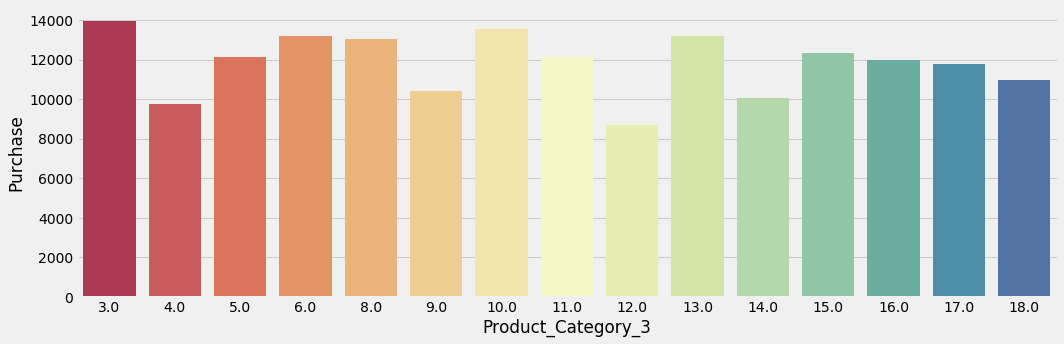

In [33]:
plt.figure(figsize=(20,20))
sns.catplot('Product_Category_3', 'Purchase',kind='bar', data = data,palette='Spectral',ci=None,aspect=3)
plt.show()

#### CATEGORICAL VARIABLES

#### GENDER AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

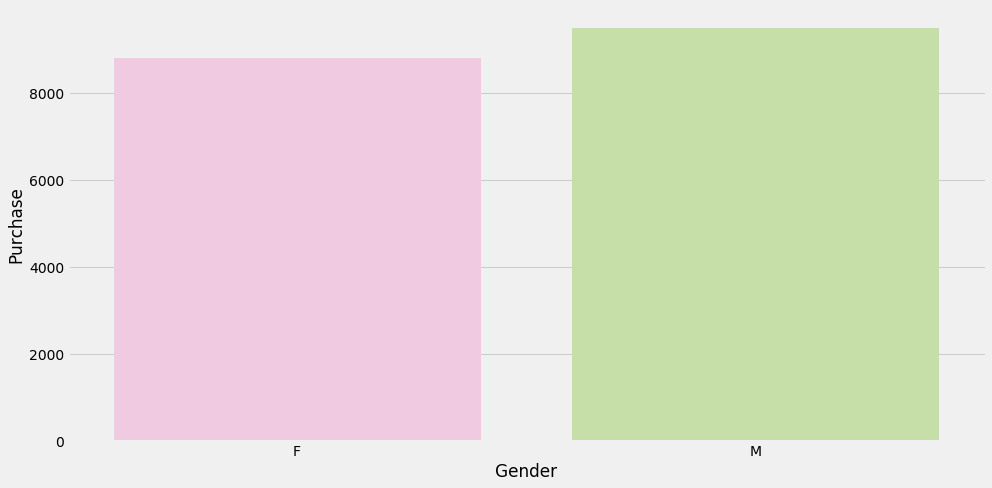

In [34]:
plt.figure(figsize=(20,20))
sns.catplot('Gender', 'Purchase',kind='bar', data = data,palette='PiYG',ci=None,aspect=2,height=7)
plt.show()

#### AGE AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

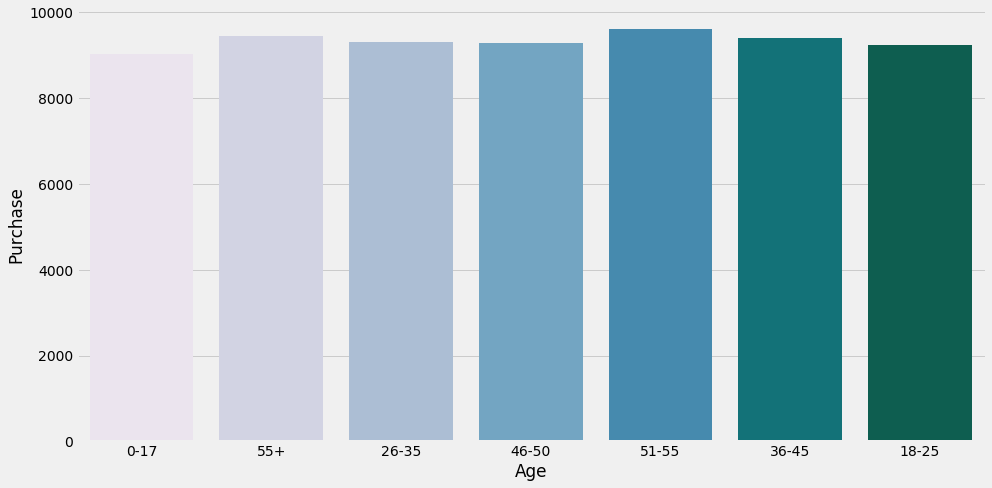

In [35]:
plt.figure(figsize=(20,20))
sns.catplot('Age', 'Purchase',kind='bar', data = data,palette='PuBuGn',ci=None,aspect=2,height=7)
plt.show()

#### CITY CATEGORY AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

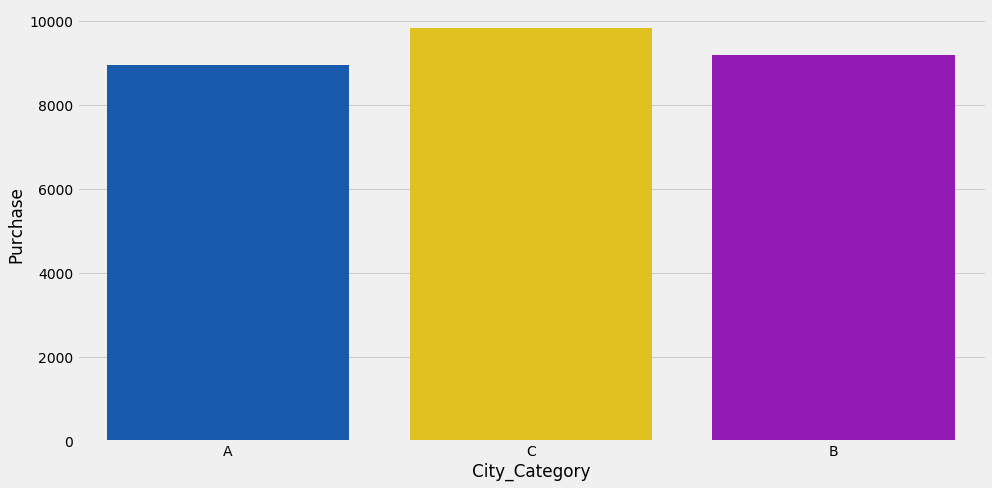

In [36]:
plt.figure(figsize=(20,20))
sns.catplot('City_Category', 'Purchase',kind='bar', data = data,palette='prism',ci=None,aspect=2,height=7)
plt.show()

#### STAY IN CURRENT CITY AND PURCHASE ANALYSIS

<Figure size 1440x1440 with 0 Axes>

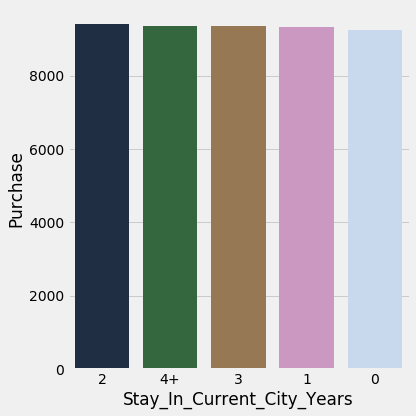

In [37]:
plt.figure(figsize=(20,20))
sns.catplot('Stay_In_Current_City_Years', 'Purchase',kind='bar', data = data,palette='cubehelix',ci=None,height=6)
plt.show()

## DATA PREPROCESSING

### NUMERICAL VARIABLES

#### FINDING MISSING VALUES

In [38]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
dtype: float64

#### IMPUTING MISSING VALUES

In [39]:
data = data.fillna(0)

In [40]:
data.isnull().sum()/data.shape[0]*100

User_ID                       0.0
Product_ID                    0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
dtype: float64

### CATEGORICAL VARIABLES

### DATA CLEANING

In [41]:
data['Stay_In_Current_City_Years'].unique()

array([2, '4+', 3, 1, 0], dtype=object)

In [42]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+','4')
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(float)

### FEATURE ENGINEERING

#### CONVERTING GENDER TO BINARY

In [43]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

#### CONVERTING AGE TO NUMERIC VALUES

In [44]:
data['Age']=le.fit_transform(data['Age'])

#### CONVERTING CITY CATEGORY TO NUMERIC VALUES

In [45]:
data['City_Category']=le.fit_transform(data['City_Category'])

## PREPARED DATA

In [46]:
data.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,P00069042,3,0.0,0.0,8370,0,0,10,0,2.0
1,1000001,P00248942,1,6.0,14.0,15200,0,0,10,0,2.0
2,1000001,P00087842,12,0.0,0.0,1422,0,0,10,0,2.0
3,1000001,P00085442,12,14.0,0.0,1057,0,0,10,0,2.0
4,1000002,P00285442,8,0.0,0.0,7969,1,6,16,2,4.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
Gender                        537577 non-null int32
Age                           537577 non-null int32
Occupation                    537577 non-null int64
City_Category                 537577 non-null int32
Stay_In_Current_City_Years    537577 non-null float64
dtypes: float64(3), int32(3), int64(4), object(1)
memory usage: 39.0+ MB


In [48]:
data.describe()

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
count,5.375770e+05,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000
mean,1.002992e+06,5.295546,6.784907,3.871773,9333.859853,0.754087,2.494755,8.08271,1.040567,1.859458
std,1.714393e+03,3.750701,6.211618,6.265963,4981.022133,0.430627,1.352583,6.52412,0.759627,1.289828
min,1.000001e+06,1.000000,0.000000,0.000000,185.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.001495e+06,1.000000,0.000000,0.000000,5866.000000,1.000000,2.000000,2.00000,0.000000,1.000000
50%,1.003031e+06,5.000000,5.000000,0.000000,8062.000000,1.000000,2.000000,7.00000,1.000000,2.000000
75%,1.004417e+06,8.000000,14.000000,8.000000,12073.000000,1.000000,3.000000,14.00000,2.000000,3.000000
max,1.006040e+06,18.000000,18.000000,18.000000,23961.000000,1.000000,6.000000,20.00000,2.000000,4.000000


## APRIORI (ASSOCIATION RULE LEARNING)

#### ARANGING THE DATASET IN A PROPER ORDER

In [49]:
basket_data = data.loc[:,['User_ID','Product_ID']]
count = basket_data.groupby(['User_ID', 
'Product_ID']).size().reset_index(name='Count')
basket = (count.groupby(['User_ID', 'Product_ID'])['Count']
                  .sum().unstack().reset_index().fillna(0)
                  .set_index('User_ID'))

In [50]:
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

In [51]:
frequent_itemsets

,support,itemsets
0,0.191818,(P00000142)
1,0.062977,(P00000242)
2,0.086912,(P00000642)
3,0.083857,(P00001042)
4,0.097097,(P00001142)
...,...,...
1916,0.061450,"(P00270942, P0097242)"
1917,0.055339,"(P00278642, P00334242)"
1918,0.053302,"(P00338442, P00334242)"
1919,0.050246,"(P00355142, P00334242)"


In [52]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [53]:
rules.sort_values(by = 'lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2287,(P00193542),(P00120042),0.102869,0.151417,0.051095,0.496700,3.280334,0.035519,1.686036
2286,(P00120042),(P00193542),0.151417,0.102869,0.051095,0.337444,3.280334,0.035519,1.354046
2607,(P00248142),(P00250242),0.137328,0.128841,0.051265,0.373300,2.897381,0.033571,1.390075
2606,(P00250242),(P00248142),0.128841,0.137328,0.051265,0.397892,2.897381,0.033571,1.432753
1160,(P00120042),(P00057942),0.151417,0.131387,0.053981,0.356502,2.713378,0.034086,1.349831
...,...,...,...,...,...,...,...,...,...
1510,(P00086442),(P00265242),0.162281,0.315396,0.055848,0.344142,1.091142,0.004665,1.043829
434,(P00265242),(P00025442),0.315396,0.269224,0.088440,0.280409,1.041545,0.003528,1.015543
435,(P00025442),(P00265242),0.269224,0.315396,0.088440,0.328499,1.041545,0.003528,1.019513
2019,(P00112142),(P00265242),0.261246,0.315396,0.085045,0.325536,1.032149,0.002649,1.015034


In [55]:
pd.set_option('display.max_rows', None)
top_100=rules.sort_values(by='lift',ascending=False).head(100)
top_100

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2287,(P00193542),(P00120042),0.102869,0.151417,0.051095,0.496700,3.280334,0.035519,1.686036
2286,(P00120042),(P00193542),0.151417,0.102869,0.051095,0.337444,3.280334,0.035519,1.354046
2607,(P00248142),(P00250242),0.137328,0.128841,0.051265,0.373300,2.897381,0.033571,1.390075
2606,(P00250242),(P00248142),0.128841,0.137328,0.051265,0.397892,2.897381,0.033571,1.432753
1160,(P00120042),(P00057942),0.151417,0.131387,0.053981,0.356502,2.713378,0.034086,1.349831
1161,(P00057942),(P00120042),0.131387,0.151417,0.053981,0.410853,2.713378,0.034086,1.440357
1394,(P00073842),(P00140742),0.156340,0.132575,0.056018,0.358306,2.702666,0.035291,1.351774
1395,(P00140742),(P00073842),0.132575,0.156340,0.056018,0.422535,2.702666,0.035291,1.460972
1515,(P00323942),(P00086442),0.133424,0.162281,0.057376,0.430025,2.649874,0.035723,1.469747
1514,(P00086442),(P00323942),0.162281,0.133424,0.057376,0.353556,2.649874,0.035723,1.340529
